In [10]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets # import datasets
import numpy as np # import numpy
import matplotlib.pyplot as plt # import plots

# set the seed for the random number generator
mySeed=1234567

# load data
iris = datasets.load_iris() # load data 
X = iris.data # get features
y = iris.target # get targets
#print(iris.DESCR) # print dataset description
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
''' Prints data and their labels to get a better understanding of the dataset '''
for i in range(len(X)):
    if(y[i] == 0):
        print(X[i], iris.target_names[0])
    if(y[i] == 1):
        print(X[i], iris.target_names[1])
    if(y[i] == 2):
        print(X[i], iris.target_names[2])


[5.1 3.5 1.4 0.2] setosa
[4.9 3.  1.4 0.2] setosa
[4.7 3.2 1.3 0.2] setosa
[4.6 3.1 1.5 0.2] setosa
[5.  3.6 1.4 0.2] setosa
[5.4 3.9 1.7 0.4] setosa
[4.6 3.4 1.4 0.3] setosa
[5.  3.4 1.5 0.2] setosa
[4.4 2.9 1.4 0.2] setosa
[4.9 3.1 1.5 0.1] setosa
[5.4 3.7 1.5 0.2] setosa
[4.8 3.4 1.6 0.2] setosa
[4.8 3.  1.4 0.1] setosa
[4.3 3.  1.1 0.1] setosa
[5.8 4.  1.2 0.2] setosa
[5.7 4.4 1.5 0.4] setosa
[5.4 3.9 1.3 0.4] setosa
[5.1 3.5 1.4 0.3] setosa
[5.7 3.8 1.7 0.3] setosa
[5.1 3.8 1.5 0.3] setosa
[5.4 3.4 1.7 0.2] setosa
[5.1 3.7 1.5 0.4] setosa
[4.6 3.6 1.  0.2] setosa
[5.1 3.3 1.7 0.5] setosa
[4.8 3.4 1.9 0.2] setosa
[5.  3.  1.6 0.2] setosa
[5.  3.4 1.6 0.4] setosa
[5.2 3.5 1.5 0.2] setosa
[5.2 3.4 1.4 0.2] setosa
[4.7 3.2 1.6 0.2] setosa
[4.8 3.1 1.6 0.2] setosa
[5.4 3.4 1.5 0.4] setosa
[5.2 4.1 1.5 0.1] setosa
[5.5 4.2 1.4 0.2] setosa
[4.9 3.1 1.5 0.2] setosa
[5.  3.2 1.2 0.2] setosa
[5.5 3.5 1.3 0.2] setosa
[4.9 3.6 1.4 0.1] setosa
[4.4 3.  1.3 0.2] setosa
[5.1 3.4 1.5 0.2] setosa




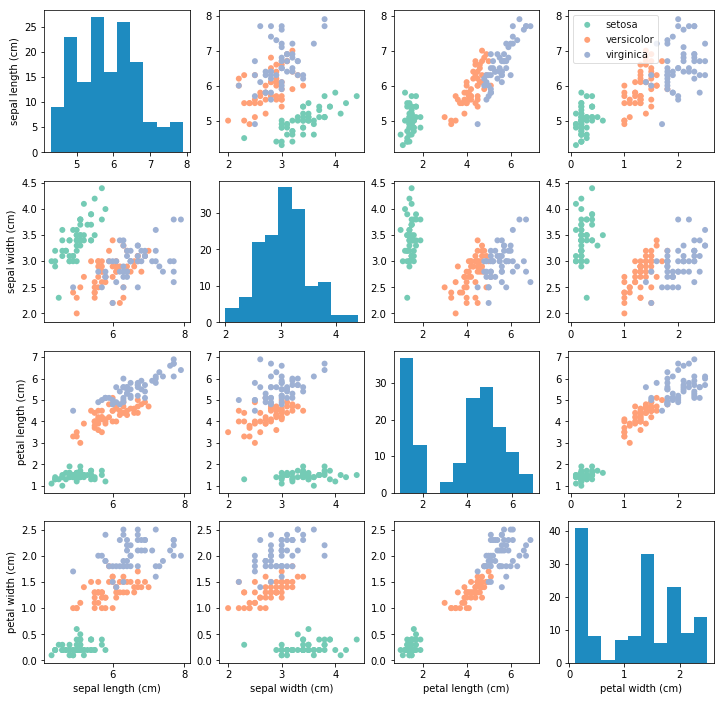

        
    myplotGrid(X,y)
    


In [12]:
'''  taking the data and the labels(0,1,2)'''
def myplotGrid(X,y):
# create a figure with multiple subplots
    fig = plt.figure(figsize=(12,12))
# Your code here...
    count = 1
    ''' 4 by 4 grid to add data '''
    for i in range(0,4):
        for j in range (0,4):
            ax = fig.add_subplot(4,4,count)
            #when i == j, (diagonal), to draw the histograms
            if i==j:
                ax.hist(X[:,i])
            else:
            #printing the legend - also used to scatter the points and add legend 
                for x in range(len(iris.target_names)):
                    ax.scatter(X[:, j], X[:, i],c=y,cmap=plt.cm.Paired, label = iris.target_names[x])
                    if i==0 and j==3:
                        ax.legend()
                        
            count+=1
            
            #used to add the labels along x axis
            if i == 3:
                plt.xlabel(iris['feature_names'][j])
            #used to add the labels along y axis
            if j==0:
                plt.ylabel(iris['feature_names'][i])
            
    
    

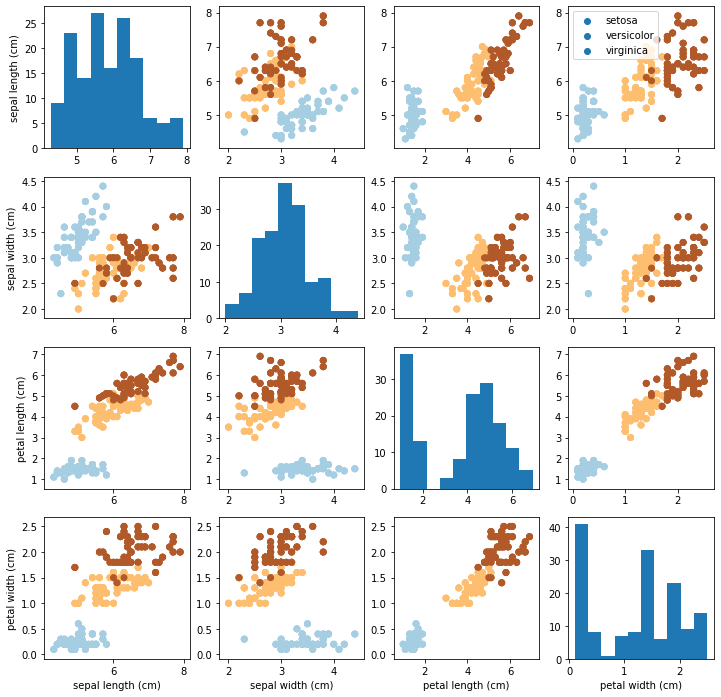

In [13]:
# run the plotting function
myplotGrid(X,y) # visualise data

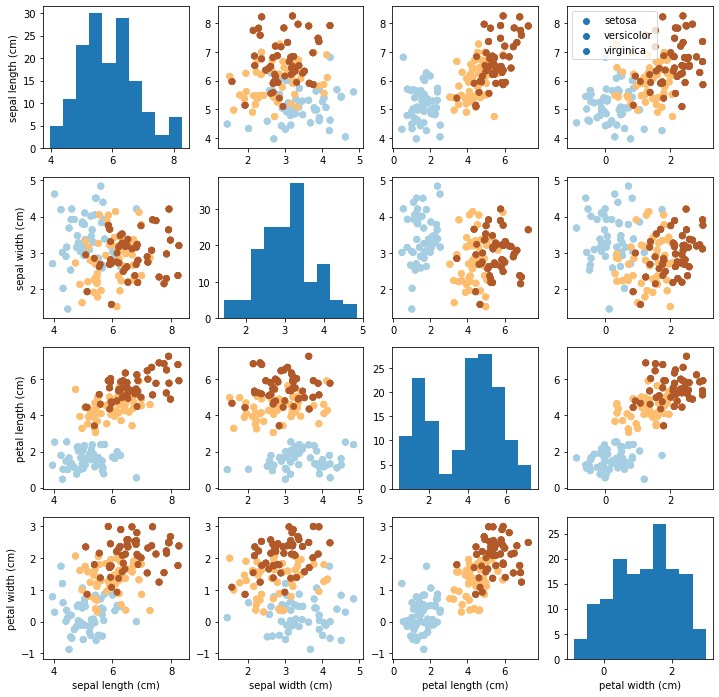

In [14]:
#adding noise to the graph
np.random.seed(mySeed) 
XN=X+np.random.normal(0,0.5,X.shape)
myplotGrid(XN,y)

## 2. Implementing kNN


In [7]:
#splitting trainingSet and testSet 70 - 30
arr_rand = np.random.rand(X.shape[0])
split = arr_rand < np.percentile(arr_rand, 70)
X_train = X[split]
# y_train = y[split]
# X_test =  X[~split]
# y_test = y[~split]
# print (len(X_train))#105
# print (len(X_test))#45

import math
#function to calculate euclidean distance - 
#reference: https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy
'''taking 2 lists and calculates euclidean distance'''
def euclideanDist(inst1, inst2):
    distance = 0
    #iterate through length of one list/instance
    for x in range(len(inst1)):
        #subtract the elements, square it, and add it to the distance variables
        distance += pow((inst1[x] - inst2[x]),2)
        #return square root of distance
    return math.sqrt(distance)

#function to calculate manhattan distance
#reference: https://www.geeksforgeeks.org/sum-manhattan-distances-pairs-points/
'''taking 2 lists and calculates manhattan distance - returns the sum of absolute values between the differences in the 2 lists'''
def manhattanDist(inst1, inst2):
    return np.sum(np.abs(inst1-inst2))

import operator

#function to get neighbours
#Reference: https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/
#parameters: data to be predicted, Data, labels, number of neighbours to look for, and distance - euclidean or manhattan
def getNeighbours(x_,X, y,n, dist):
    #create list
    d = list()
    #iterating through data
    for train in X:
        #if dist given is euclidean, then it will calculate using euclidean function
        if dist == 'euclidean':
            #calculate distance between data to be predicted and training data
            dist = euclideanDist(x_, train)
        else:
        #else, it will calculate using manhattan function
        #calculate distance between data to be predicted and training data
            dist = manhattanDist(x_, train)
        #add train data and distances to the list
        d.append((train, dist))
    #sort by distances
    d.sort(key=lambda tup: tup[1])
    #create a list for neighbours
    neighbours = list()
    #iterate through number of neighbours given (number of k)
    for i in range(n):
        #iterate through length if data
        for j in range(len(X)):
            #add indices of neighbours to the list
            if(np.all(X[j] == d[i][0])):
                neighbours.append(y[j])
    #return neighbours
    return neighbours

k = 3

#assignLabels - returns most common value
#reference: https://stackoverflow.com/questions/28961246/numpy-bincount-and-numpy-argmax-function-pseudocodes
def assignLabel(nLabels):
    return np.argmax(np.bincount(nLabels))

#X_ is data to be predicted
#knn function
#parameters: data, labels, data to be predicted, number of neighbours, distance
#Reference: https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/
def mykNN(X,y,X_, k, distance):
    #create an array
    retArr = []
    #iterate through data to be predicted
    for i in range(len(X_)):
        #getting the neighbours and assigning them to the variable: neighbours
        neighbours = getNeighbours(X_[i],X,y, k, distance)
        #labels for neighbours
        labels = assignLabel(neighbours)
        #add them to array
        retArr.append(labels)
    return retArr
#returns array containing labels - 2 labels would be returned if k = 2


## 3. Nested Cross-validation using your implementation of KNN


In [9]:
#function to calculate accuracy - number of good guesses/ total number -> *100
def accuracyCalculator(yTest, yPred):
    accuracy = 0
    for i in range(len(yTest)):
        #checks if the elements are the same, if they are, then add one to accuracy
        if(yTest[i] == yPred[i]):
            accuracy += 1
    #calculate the accuracy and return it
    return (accuracy/len(yTest) * 100)

#reference: https://stackoverflow.com/questions/2148543/how-to-write-a-confusion-matrix-in-python/30385488
#taking ypred and yactual
def confusionMatrix(y1, y2):
    confM = np.zeros((3, 3), dtype=int)
    #adding zeros and the corresponding arguments
    np.add.at(confM, [y1, y2], 1)
    return confM

#function for nested cross validation - used lab material
#reference: https://mlfromscratch.com/nested-cross-validation-python-code/
def myNestedCrossVal(X,y,foldK,nns,dists,mySeed):
    np.random.seed(mySeed)
    #arrays to store accuracy, best parameters and best matrices
    accuracy_fold=[]
    best_parameters_fold = []
    best_matrices = []

    #randomise indices
    indices=np.random.permutation(X.shape[0])

    
    #TASK: use the function array_split to split the indices to foldK different bins (here, 5)
   
    #split bins in foldK parts - 5
    bins=np.array_split(indices, foldK)

    
    #no need to worry about this, just checking that everything is OK
    assert(foldK==len(bins))
    
    #loop through folds
    for i in range(0,foldK):
        foldTrain=[] # list to save current indices for training
        foldTest=[]  # list to save current indices for testing

        #insert code here
        foldTest = bins[i]
        
        #add whatever is not in foldTest to foldTrain
        for k in range(0, foldK):
            if k != i:
                foldTrain.extend(bins[k])
        
        #stores accuracy
        arrAcc = []
        #stores number of neighbours
        arrZ = []
        #stores distance
        arrL = []
        #stores matrices
        confMatrix = []
        #iterating through neighbours and distances
        for z in nns:
            for l in dists:
                #print(l)
                #store the knn to a variable called outputs
                outputs = mykNN(X[foldTrain], y[foldTrain], X[foldTest], z, l)
                #print(accuracyCalculator(y[foldTest], outputs))
                #add accuracies to the array; the function to calculate accuracies has been used
                arrAcc.append(accuracyCalculator(y[foldTest], outputs))
                #add matrices to array using the function
                confMatrix.append(confusionMatrix(y[foldTest], outputs))
                #confMatrix.append(confusionMatrix(outputs, y[foldTest]))
                #add neighbours to array
                arrZ.append(z)
                #add distance to array
                arrL.append(l)
                #print the outcome
                print('Fold ',(i+1),' Accuracy is: ', accuracyCalculator(y[foldTest], outputs),'Number of Neighbours is: ', z
                     ,'Distance is: ', l, 'Confusion Matrix is: ', confusionMatrix(y[foldTest], outputs))
                    
        
        #the best outcomes
        #gets index of the highest accuracy
        maxNumber = arrAcc.index(max(arrAcc))
       
        #print best outcomes
        print('Fold: ',(i+1) , 'Best accuracy is: ' , arrAcc[maxNumber], 'Best No of Neighbours is: ' , arrZ[maxNumber], 'Best Distance is: ', arrL[maxNumber], 
              )
        print('\n')
        
        print('Fold: ',(i+1) ,'Best confusion Matrix is: ', confMatrix[maxNumber])
        #add the best accuracy of every fold to the accuracy_fold array
        accuracy_fold.append(arrAcc[maxNumber])
        #add the best number of neighbours and distance used to the best_parameters
        best_parameters_fold.append({'k' : arrZ[maxNumber], 'distance' : arrL[maxNumber]})
        #add the best matrix to the array
        best_matrices.append(confMatrix[maxNumber])

    return accuracy_fold, best_parameters_fold, best_matrices;

#call your nested crossvalidation function:
 
accuracy_fold, best_parameters_fold, best_matrices=myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
accuracy_fold_noisy, best_parameters_fold_noisy, best_matrices_noisy=myNestedCrossVal(XN,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
print(accuracy_fold)
    

C:\Users\drago\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  from ipykernel import kernelapp as app


Fold  1  Accuracy is:  96.66666666666667 Number of Neighbours is:  1 Distance is:  euclidean Confusion Matrix is:  [[11  0  0]
 [ 0 10  1]
 [ 0  0  8]]
Fold  1  Accuracy is:  96.66666666666667 Number of Neighbours is:  1 Distance is:  manhattan Confusion Matrix is:  [[11  0  0]
 [ 0 10  1]
 [ 0  0  8]]
Fold  1  Accuracy is:  96.66666666666667 Number of Neighbours is:  2 Distance is:  euclidean Confusion Matrix is:  [[11  0  0]
 [ 0 10  1]
 [ 0  0  8]]
Fold  1  Accuracy is:  96.66666666666667 Number of Neighbours is:  2 Distance is:  manhattan Confusion Matrix is:  [[11  0  0]
 [ 0 10  1]
 [ 0  0  8]]
Fold  1  Accuracy is:  96.66666666666667 Number of Neighbours is:  3 Distance is:  euclidean Confusion Matrix is:  [[11  0  0]
 [ 0 10  1]
 [ 0  0  8]]
Fold  1  Accuracy is:  96.66666666666667 Number of Neighbours is:  3 Distance is:  manhattan Confusion Matrix is:  [[11  0  0]
 [ 0 10  1]
 [ 0  0  8]]
Fold  1  Accuracy is:  96.66666666666667 Number of Neighbours is:  4 Distance is:  eucli

Fold  3  Accuracy is:  96.66666666666667 Number of Neighbours is:  8 Distance is:  euclidean Confusion Matrix is:  [[ 5  0  0]
 [ 0 14  0]
 [ 0  1 10]]
Fold  3  Accuracy is:  96.66666666666667 Number of Neighbours is:  8 Distance is:  manhattan Confusion Matrix is:  [[ 5  0  0]
 [ 0 14  0]
 [ 0  1 10]]
Fold  3  Accuracy is:  93.33333333333333 Number of Neighbours is:  9 Distance is:  euclidean Confusion Matrix is:  [[ 5  0  0]
 [ 0 13  1]
 [ 0  1 10]]
Fold  3  Accuracy is:  93.33333333333333 Number of Neighbours is:  9 Distance is:  manhattan Confusion Matrix is:  [[ 5  0  0]
 [ 0 13  1]
 [ 0  1 10]]
Fold  3  Accuracy is:  96.66666666666667 Number of Neighbours is:  10 Distance is:  euclidean Confusion Matrix is:  [[ 5  0  0]
 [ 0 13  1]
 [ 0  0 11]]
Fold  3  Accuracy is:  96.66666666666667 Number of Neighbours is:  10 Distance is:  manhattan Confusion Matrix is:  [[ 5  0  0]
 [ 0 14  0]
 [ 0  1 10]]
Fold:  3 Best accuracy is:  96.66666666666667 Best No of Neighbours is:  3 Best Distan

Fold  1  Accuracy is:  80.0 Number of Neighbours is:  4 Distance is:  manhattan Confusion Matrix is:  [[11  0  0]
 [ 0  9  2]
 [ 0  4  4]]
Fold  1  Accuracy is:  76.66666666666667 Number of Neighbours is:  5 Distance is:  euclidean Confusion Matrix is:  [[11  0  0]
 [ 0  7  4]
 [ 0  3  5]]
Fold  1  Accuracy is:  76.66666666666667 Number of Neighbours is:  5 Distance is:  manhattan Confusion Matrix is:  [[11  0  0]
 [ 0  7  4]
 [ 0  3  5]]
Fold  1  Accuracy is:  83.33333333333334 Number of Neighbours is:  6 Distance is:  euclidean Confusion Matrix is:  [[11  0  0]
 [ 0  9  2]
 [ 0  3  5]]
Fold  1  Accuracy is:  83.33333333333334 Number of Neighbours is:  6 Distance is:  manhattan Confusion Matrix is:  [[11  0  0]
 [ 0  9  2]
 [ 0  3  5]]
Fold  1  Accuracy is:  80.0 Number of Neighbours is:  7 Distance is:  euclidean Confusion Matrix is:  [[11  0  0]
 [ 0  8  3]
 [ 0  3  5]]
Fold  1  Accuracy is:  80.0 Number of Neighbours is:  7 Distance is:  manhattan Confusion Matrix is:  [[11  0  0]


Fold  4  Accuracy is:  93.33333333333333 Number of Neighbours is:  1 Distance is:  euclidean Confusion Matrix is:  [[11  0  0]
 [ 0  6  1]
 [ 0  1 11]]
Fold  4  Accuracy is:  93.33333333333333 Number of Neighbours is:  1 Distance is:  manhattan Confusion Matrix is:  [[11  0  0]
 [ 0  6  1]
 [ 0  1 11]]
Fold  4  Accuracy is:  96.66666666666667 Number of Neighbours is:  2 Distance is:  euclidean Confusion Matrix is:  [[11  0  0]
 [ 0  7  0]
 [ 0  1 11]]
Fold  4  Accuracy is:  96.66666666666667 Number of Neighbours is:  2 Distance is:  manhattan Confusion Matrix is:  [[11  0  0]
 [ 0  7  0]
 [ 0  1 11]]
Fold  4  Accuracy is:  100.0 Number of Neighbours is:  3 Distance is:  euclidean Confusion Matrix is:  [[11  0  0]
 [ 0  7  0]
 [ 0  0 12]]
Fold  4  Accuracy is:  100.0 Number of Neighbours is:  3 Distance is:  manhattan Confusion Matrix is:  [[11  0  0]
 [ 0  7  0]
 [ 0  0 12]]
Fold  4  Accuracy is:  96.66666666666667 Number of Neighbours is:  4 Distance is:  euclidean Confusion Matrix is

### 3.2. Summary of results



In [8]:
import pandas as pd
# reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

#create a function to store all the data
#taking the best accuracies and best parameters as they have to be represented in the table
def tableData(accuracy_fold, best_parameters_fold):
    #empty array
    listClean = []
    for i in range(len(accuracy_fold)):
        newList = []
        #number of folds as shown in the table above
        newList.append(i+1)
        #get the elements of accuracy_fold to be displayed in the accuracy column
        newList.append(accuracy_fold[i])
        #get the neighbours from best_parameters_fold to display under 'k'
        newList.append(best_parameters_fold[i]['k'])
        #get the distance from the best_parameters_fold to displayed in the table
        newList.append(best_parameters_fold[i]['distance'])
        listClean.append(newList)
    return listClean

#use pd.DataFrame and call the function to display the table
#table for clean data
dataClean = pd.DataFrame(data = tableData(accuracy_fold, best_parameters_fold), columns = ['Fold', 'accuracy', 'k', 'distance'],)

dataClean
#table for data with noise in it
dataNoisy = pd.DataFrame(data = tableData(accuracy_fold_noisy, best_parameters_fold_noisy),columns = ['Fold', 'accuracy', 'k', 'distance'])

dataNoisy

,Fold,accuracy,k,distance
0,1,86.666667,2,euclidean
1,2,90.000000,2,euclidean
2,3,90.000000,9,manhattan
3,4,100.000000,3,euclidean
4,5,93.333333,9,euclidean


### 3.3. Confusion matrix summary


----

In [34]:
#5 matrices that have to be added together
sumOfMatrices = np.sum(best_matrices, axis = 0)
print(sumOfMatrices)

#reference:https://www.python-course.eu/confusion_matrix.php
#calculate precision
#taking labels and the sum of all matrices
def precision(label, sumOfMatrices):
    col = sumOfMatrices[:, label]
    return sumOfMatrices[label, label] / col.sum()

print ('For class setosa the precision is: ', 
precision(0, sumOfMatrices))

print ('For class versicolor the precision is: ', 
precision(1, sumOfMatrices))

print ('For class virginica the precision is: ', 
precision(2, sumOfMatrices))

#reference: https://www.python-course.eu/confusion_matrix.php
#calculate recall
#taking labels and the sum of all matrices
def recall(label, sumOfMatrices):
    row = sumOfMatrices[label, :]
    return sumOfMatrices[label, label] / row.sum()

print ('For class setosa the recall is: ', 
recall(0, sumOfMatrices))

print ('For class versicolor the recall is: ', 
recall(1, sumOfMatrices))

print ('For class virginica the recall is: ', 
recall(2, sumOfMatrices))

[[50  0  0]
 [ 0 48  2]
 [ 0  2 48]]
For class setosa the precision is:  1.0
For class versicolor the precision is:  0.96
For class virginica the precision is:  0.96
For class setosa the recall is:  1.0
For class versicolor the recall is:  0.96
For class virginica the recall is:  0.96
